<a href="https://colab.research.google.com/github/udityadav35/CODSOFT/blob/data-science/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
print(data.shape)


(1986, 31)


In [5]:
print(data.describe())

              Time           V1           V2           V3           V4  \
count  1986.000000  1986.000000  1986.000000  1986.000000  1986.000000   
mean    761.035750    -0.284195     0.266886     0.848005     0.151216   
std     451.034025     1.353508     1.142026     1.012645     1.264932   
min       0.000000   -11.140706   -12.114213   -12.389545    -4.657545   
25%     366.000000    -1.045512    -0.204111     0.280517    -0.670513   
50%     750.000000    -0.437621     0.314294     0.864505     0.190698   
75%    1161.000000     1.095047     0.926126     1.486942     1.002546   
max    1526.000000     1.685314     6.118940     4.017561     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  1986.000000  1986.000000  1986.000000  1986.000000  1986.000000  ...   
mean     -0.077457     0.050205     0.138347    -0.058795     0.012145  ...   
std       1.272512     1.274204     1.140750     0.966493     0.900828  ...   
min     -32.09212

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0010085728693898135
Fraud Cases: 2
Valid Transactions: 1983


In [9]:
print("Amount details of the fraudulent transaction")
print(fraud['Amount'].describe())

Amount details of the fraudulent transaction
count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64


In [11]:
print("Details of valid transactions")
print(valid['Amount'].describe())

Details of valid transactions
count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64


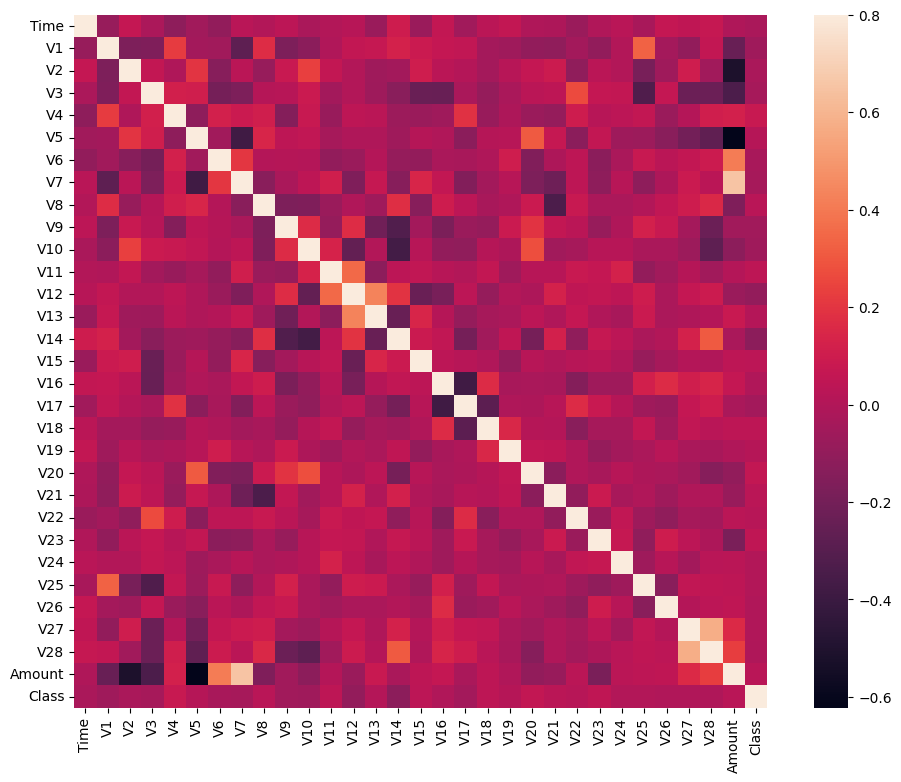

In [12]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(1986, 30)
(1986,)


In [15]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [44]:
rfc = RandomForestClassifier()

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

# Handling missing values in yTrain
if isinstance(yTrain, pd.Series):  # If yTrain is a pandas Series
    if yTrain.isnull().any():
        yTrain = yTrain.dropna()
        xTrain = xTrain.loc[yTrain.index]
elif isinstance(yTrain, np.ndarray):  # If yTrain is a NumPy array
    missing_values_mask = ~np.isnan(yTrain)
    xTrain = xTrain[missing_values_mask]
    yTrain = yTrain[missing_values_mask]

# Initialize and train the Random Forest model
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# Make predictions
yPred = rfc.predict(xTest)

# Evaluate the model
print("Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred))


Accuracy: 1.0
Confusion Matrix:
 [[398]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       398

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [52]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 1.0
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


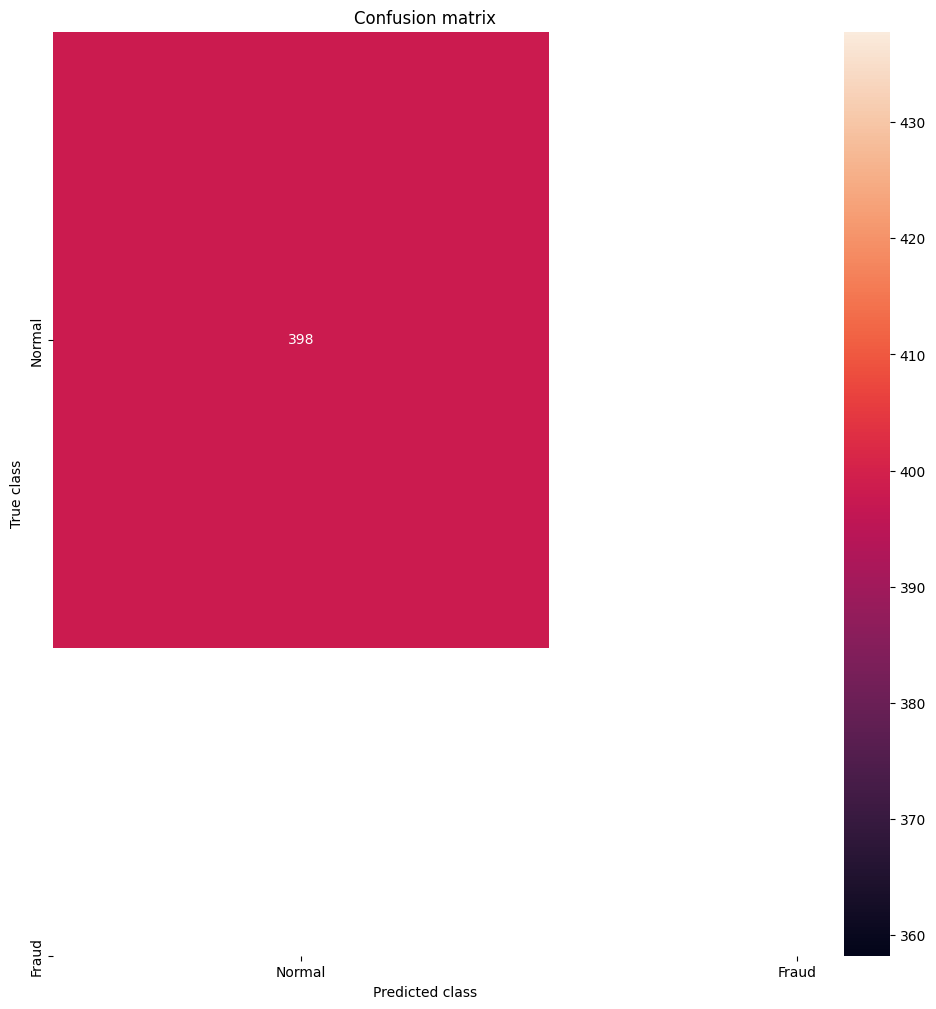

In [55]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()